# Table of contents
- [ToDo](#todo)
- [Dropping columns](#dropping-columns)
- [Input features](#input-features)
- [Target distribution](#target-distribution)
- [Numerical features distributions](#numerical-features-distributions)
- [Categorical features distributions](#categorical_features_distributions)
- [Correlation](#correlation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

### ToDo
- What to do with inbalanced target?
- What to do with balance -> should it be 2 different models: customers with almost 0 balance and the rest?
- Are there ouliers in CreditScore on the right? Can we skip them? Do we want all numeric features look like normal distribution?
- Try to guess nationality by name (do clusters)

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15709511.0,Ch'ang,754.0,Spain,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Genovese,579.0,France,Female,28.0,1.0,0.00,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Yeh,744.0,France,Female,56.0,5.0,0.00,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Nwachinemelu,697.0,France,Male,29.0,2.0,0.00,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Hs?eh,628.0,France,Female,22.0,9.0,0.00,2.0,1.0,0.0,49653.39,0.0


### Dropping columns
Drop id and CustomerId columns as they will not be usefull for analysis.

In [4]:
df_train = df_train.drop(columns=['id', 'CustomerId'])

### Input features
There are no null values in the dataset.  
There are 6 categorical features: Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember.  
There are 4 numerical features: CreditScore, Age, Tenure, Balance, EstimatedSalary.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          15000 non-null  object 
 1   CreditScore      15000 non-null  float64
 2   Geography        15000 non-null  object 
 3   Gender           15000 non-null  object 
 4   Age              15000 non-null  float64
 5   Tenure           15000 non-null  float64
 6   Balance          15000 non-null  float64
 7   NumOfProducts    15000 non-null  float64
 8   HasCrCard        15000 non-null  float64
 9   IsActiveMember   15000 non-null  float64
 10  EstimatedSalary  15000 non-null  float64
 11  Exited           15000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.4+ MB


In [6]:
categ_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

### Target distribution
Target class is inbalanced

In [7]:
df_train.groupby(by='Exited').size()

Exited
0.0    11942
1.0     3058
dtype: int64

### Numerical features distributions

Estimated salary has outliers.

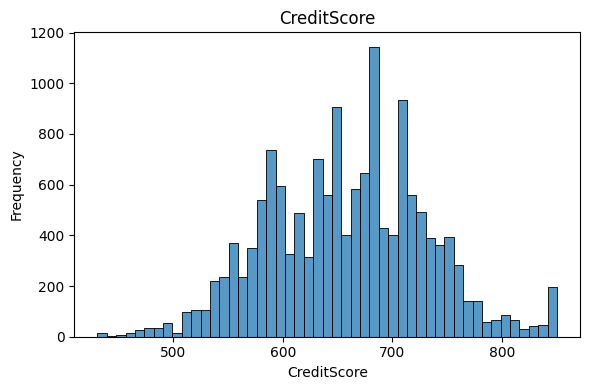

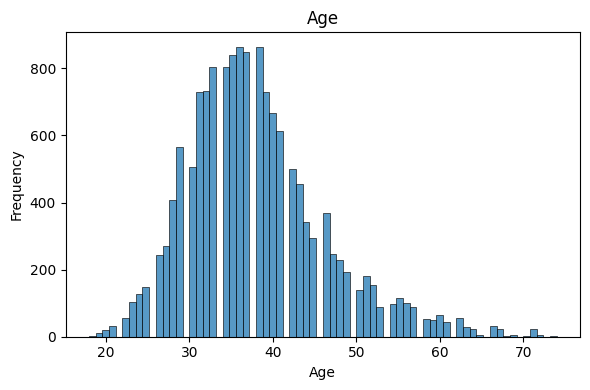

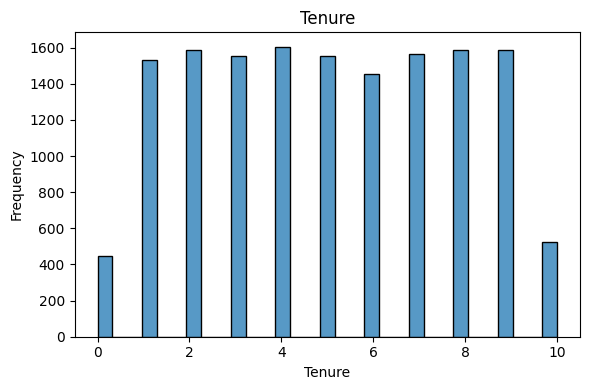

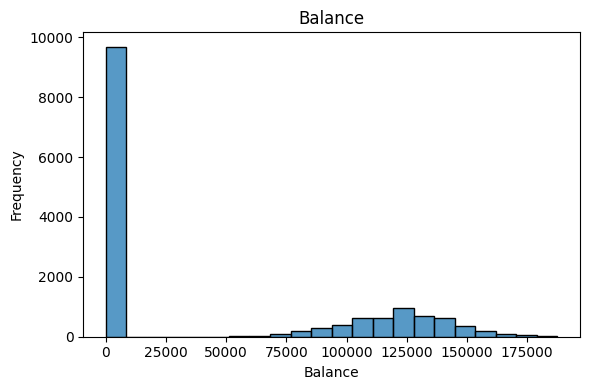

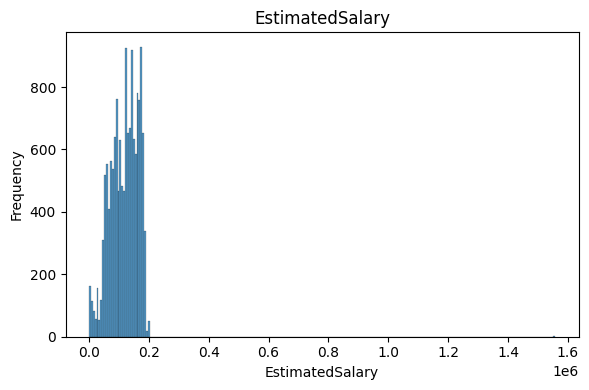

In [8]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [9]:
df_train.sort_values("EstimatedSalary").iloc[-10:, :]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9799,Chidiegwu,554.0,Germany,Female,51.0,9.0,92350.37,1.0,1.0,0.0,199693.84,1.0
4355,Ch'ien,611.0,France,Female,46.0,7.0,0.00,1.0,1.0,0.0,199805.63,1.0
13855,Hsieh,611.0,France,Male,42.0,4.0,0.00,2.0,1.0,1.0,199808.10,0.0
415,Young,679.0,France,Female,42.0,2.0,0.00,2.0,1.0,1.0,199808.10,0.0
3336,Folliero,663.0,France,Female,34.0,3.0,152582.30,1.0,0.0,1.0,199808.10,0.0
8950,Trevisano,663.0,Germany,Male,33.0,7.0,141787.31,2.0,1.0,0.0,199953.33,0.0
2862,Mazzanti,613.0,Spain,Male,44.0,3.0,166082.15,1.0,1.0,0.0,199953.33,0.0
14472,Hsu,699.0,France,Male,30.0,8.0,0.00,2.0,0.0,1.0,199953.33,0.0
12815,Calabrese,587.0,Germany,Female,63.0,9.0,128663.90,1.0,1.0,0.0,199992.48,1.0
377,Nwachinemelu,837.0,France,Male,34.0,8.0,160515.37,1.0,1.0,1.0,1557802.42,0.0


Let's drop this outlier row:

In [10]:
df_train = df_train.drop(labels=377)

Correlations between features for entries with non-zero balance.

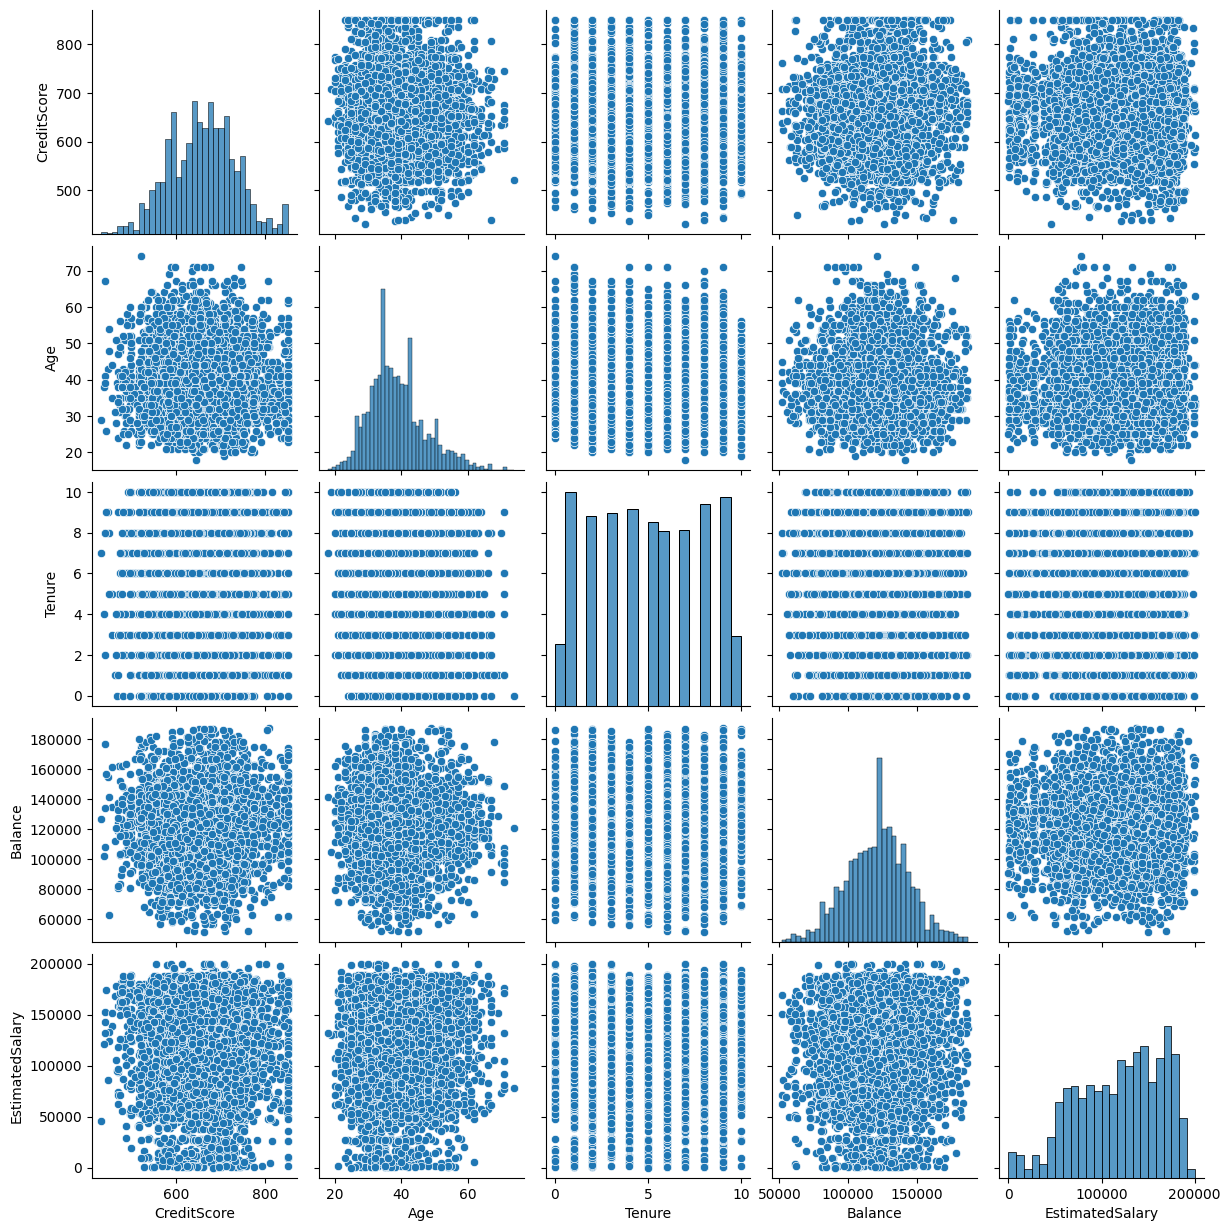

In [11]:
sns.pairplot(df_train[df_train.Balance >= 15000][numeric_features])


### Categorical features distributions

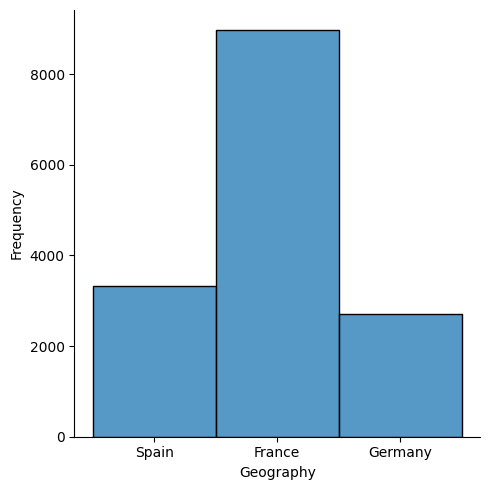

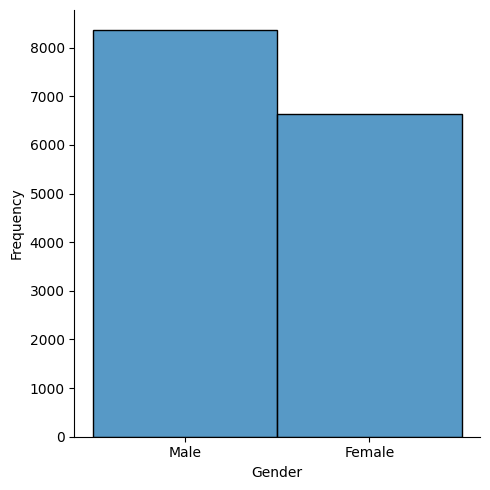

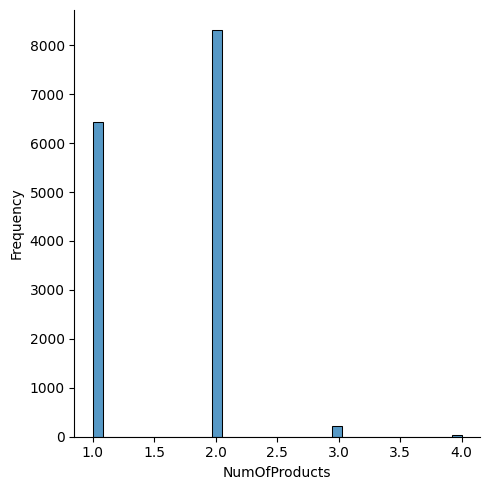

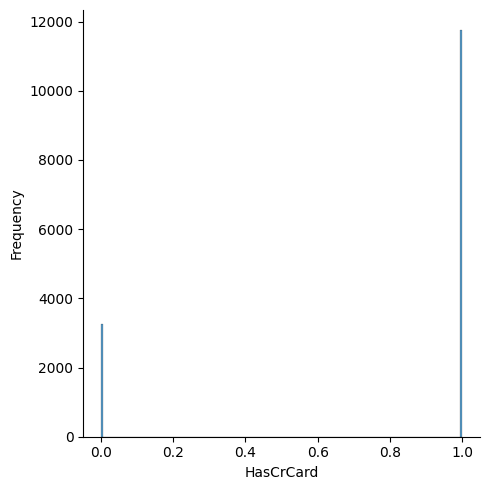

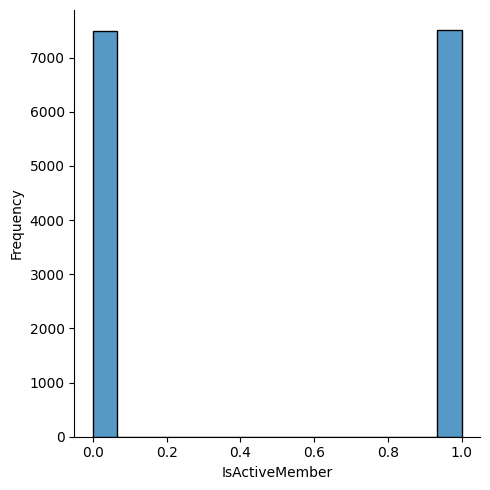

In [16]:
for col in categ_features:
    plt.Figure(figsize=(4,6))
    sns.displot(df_train, x=col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Churn rate in Germany is much higher than in France and Spain.

In [18]:
df_train.groupby(by='Geography').agg(
    count=('Exited', 'size'),
    count_exited=('Exited', lambda x: (x == 1).sum()),
    count_not_exited=('Exited', lambda x: (x == 0).sum()),
    churn_rate=('Exited', 'mean')
)

,count,count_exited,count_not_exited,churn_rate
Geography,,,,
France,8971,1393,7578,0.155278
Germany,2708,1137,1571,0.419867
Spain,3321,528,2793,0.158988


### Correlation

Metrics are not correlated much between each other.

In [22]:
df_train.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.028482,0.010710,-0.001806,0.013437,0.001626,0.005370,-0.010388,-0.045331
Age,-0.028482,1.000000,-0.004009,0.077771,-0.156109,-0.000145,-0.054189,0.009493,0.481360
Tenure,0.010710,-0.004009,1.000000,-0.007868,0.006046,0.009896,-0.016457,0.005379,-0.014987
Balance,-0.001806,0.077771,-0.007868,1.000000,-0.411825,-0.003206,-0.023057,0.009405,0.155356
NumOfProducts,0.013437,-0.156109,0.006046,-0.411825,1.000000,0.019997,0.052788,0.011343,-0.282291
HasCrCard,0.001626,-0.000145,0.009896,-0.003206,0.019997,1.000000,-0.018269,-0.023119,-0.028104
IsActiveMember,0.005370,-0.054189,-0.016457,-0.023057,0.052788,-0.018269,1.000000,-0.004779,-0.205702
EstimatedSalary,-0.010388,0.009493,0.005379,0.009405,0.011343,-0.023119,-0.004779,1.000000,0.025363
Exited,-0.045331,0.481360,-0.014987,0.155356,-0.282291,-0.028104,-0.205702,0.025363,1.000000
